In [29]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import numpy as np 
from matplotlib import pyplot as plt 
from statistics import mean, median

In [30]:
# So I need to get a sense of the data as a whole. I commented out the first print statement so I could focus on the second which shows the sums of each category. This won't make sense for certain columns like borough but will be helpful for showing how many units have features like a roofdeck, gym, etc. It looks like a patio is the least common while doormen and elevator are the most common; although, with a total of 5,000 units, even the most common features are only found in just over 20% of units. 

# The culmination of this project is a function that will take location, rent, size, and whether the building has an elevator or doorman and determine whether the unit is appropriately priced based on comporablly sized units in that location. The function returns two visualizations. One that shows a scatter plot with all units compared by price and size with a regression ilne for all comparably sized units in the specified location and display the unit you're investigating. The other graph just shows the regression line and the point for the unit your're investigating. The function also accounts for the possibiliity that there are no comparable units. 


streeteasy = pd.read_csv('streeteasy.csv')
#print(streeteasy.head())
#print(streeteasy.count())
print(streeteasy.sum())

rental_id                                                    27634547
building_id                                              256100343193
rent                                                         22684604
bedrooms                                                       6978.5
bathrooms                                                        6608
size_sqft                                                     4600507
min_to_subway                                                   25396
floor                                                           50951
building_age_yrs                                               260466
no_fee                                                           2148
has_roofdeck                                                      643
has_washer_dryer                                                  669
has_doorman                                                      1140
has_elevator                                                     1200
has_dishwasher      

In [31]:
has_elevator = streeteasy.loc[streeteasy['has_elevator'] == 1]
print(has_elevator.sum())

rental_id                                                     6140957
building_id                                               62587649079
rent                                                          6200146
bedrooms                                                       1618.5
bathrooms                                                        1648
size_sqft                                                     1161290
min_to_subway                                                    5934
floor                                                           14693
building_age_yrs                                                56735
no_fee                                                            351
has_roofdeck                                                      537
has_washer_dryer                                                  459
has_doorman                                                       926
has_elevator                                                     1200
has_dishwasher      

In [32]:
streeteasy_count = streeteasy.groupby('submarket').sum().reset_index()
print(streeteasy_count)

              submarket  rental_id  building_id     rent  bedrooms  bathrooms  \
0          All Downtown    6577085  63010067387  6972081    1511.5       1678   
1           All Midtown    5273530  51724225879  4724965    1232.5       1284   
2   All Upper East Side    2720673  25702542794  2775797     781.0        760   
3   All Upper Manhattan    1266158  11426018946   602044     373.0        273   
4   All Upper West Side    3012046  28743307341  3099995     883.5        838   
5        Central Queens     773467   6293791952   260673     166.5        142   
6         East Brooklyn     905699   8306186328   417184     326.5        193   
7        North Brooklyn    2056344  15634457582  1248490     549.0        433   
8      Northeast Queens     319484   2396077751   109770      63.0         61   
9    Northwest Brooklyn    1689208  18508316269  1213895     412.0        393   
10     Northwest Queens    1574633  13354276965   745930     353.0        306   
11        Prospect Park     

In [33]:
#First question is whether having a washer and dryer changes the price and, if so, can that change be quantified. I will first have to slice the data so that I can get a best fit line for the units w/out a unit and then with a unit. If there is no change in price, there should be no significant difference between those best fit lines. There are two ways to answer this question. The first is to use multiple linear regression to determine the impact of all variables on the rental price of a unit. I will do this first. The next is to visualize the difference in price between units with and without a washer/dryer.

units_with = streeteasy.loc[streeteasy['has_washer_dryer'] == 1]
print(units_with)
units_without = streeteasy.loc[streeteasy['has_washer_dryer'] == 0]
print(units_without)

      rental_id  building_id   rent  bedrooms  bathrooms  size_sqft  \
19         6594      9417041   4875       1.0          1        900   
22         5405     13046465   3700       1.0          1        947   
30         3491     93814173   4950       1.0          1        870   
34        11328     81974065   1950       0.0          1        400   
42         4678     41713885   7495       2.0          2       1431   
...         ...          ...    ...       ...        ...        ...   
4990       1676     86914672  18000       3.0          2       2470   
4994       7582     71691994   4210       1.0          1        532   
4996       5686     92994390   6675       2.0          2        988   
4998       5188     62828354   3475       1.0          1        651   
4999       4718     67659586   4500       1.0          1        816   

      min_to_subway  floor  building_age_yrs  no_fee  has_roofdeck  \
19                1   14.0                52       1             0   
22     

In [34]:
# The values given by multireg.coef_ match with the variables in x. So -461.18 is the coefficient associated with the impact of the number of bedrooms. This means that if all the other variables remain fixed, as the number of bedrooms goes up the rental cost goes down. This is possibly because it would mean that each room would be smaller since size would be constant. We can see that min_to_subway has a smaller negative impact. Having a washer/dryer has a positive impact of 196.97.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
streeteasy = pd.read_csv('streeteasy.csv')
x = streeteasy[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = streeteasy[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size=.8, test_size=.2, random_state=6)
multreg = LinearRegression()
multreg = multreg.fit(x_train,y_train)
y_predict = multreg.predict(x_test)
print(multreg.coef_)

[[-461.17539618 1278.6000335     4.81900428  -14.94950189   38.70966963
    -4.52297793  -90.26769009   90.64556132  196.97409914  -41.5462096
   224.20724181    9.0336051    24.12310573  -86.37764952]]


In [35]:
#Now i need to come up with a way to compare these two sets as a scatterplot. I am going to start by comparing size and price. I'll select these lists from the dataframes and then convert to arrays so that I can use the LinearRegression function from sklearn. 

X_with = units_with['size_sqft']
print(type(X_with))
X_with = X_with.values.reshape(-1,1)
print(type(X_with))
#print(X_with)
y_with = units_with['rent']
y_with = y_with.values.reshape(-1,1)
print(type(y_with))



<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [36]:
X_without = units_without['size_sqft']
print(type(X_without))
X_without = X_without.values.reshape(-1,1)
print(type(X_without))
#print(X_without)
y_without = units_without['rent']
y_without = y_without.values.reshape(-1,1)
print(type(y_without))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [37]:
reg = LinearRegression()
reg_without = LinearRegression()
reg = reg.fit(X_with,y_with)
with_y_predict = reg.predict(X_with)
reg_without = reg_without.fit(X_without,y_without)
without_y_predict = reg_without.predict(X_without)

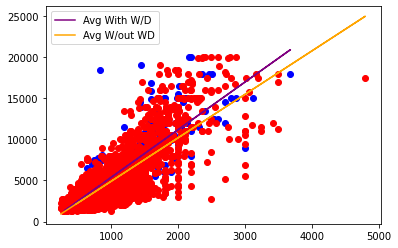

In [38]:
# So here is the graph with a scatter plot of size vs price for all units with a washer/dryer. The orange line is the best fit line for the data. We can clearly see that there is a noticeaple, but not drastic impact, on the price when distinguishing those units with a washer/dryer from those without. If looking at the difference in units that do and do not have dishwasher, we see that there is a positive impact but it is significantly less (approx 20x) that of the washer/dryer. In other words, having a washer/dryer is much more desirable than having a dishwasher. 

plt.subplot()
plt.scatter(X_with, y_with, color='blue')
plt.scatter(X_without,y_without, color='red')
plt.plot(X_with,with_y_predict, color='purple')
plt.plot(X_without,without_y_predict, color='orange')
plt.legend(['Avg With W/D', 'Avg W/out WD'])
plt.show()

In [39]:
# So those results weren't too surprising. I want to take a closer look to see if these results are hiding the fact that there are other amenities that could often, but not always, come with units that have a washer/dreyer. I start by creating a dataframe that only has the units with a dishwasher and checking how many reuslts there are (778) and how many of those have a washer/dryer (395); it's almost half. The rest of the steps will follow those from above.

units_with_dishwasher = streeteasy.loc[streeteasy['has_dishwasher'] == 1]
#print(units_with_dishwasher.count())
#print(units_with_dishwasher.sum())

In [40]:
dishwasher_with_wd = units_with_dishwasher.loc[units_with_dishwasher['has_washer_dryer'] == 1]
dishwasher_without_wd = units_with_dishwasher.loc[units_with_dishwasher['has_washer_dryer'] == 0]
X_2_with = dishwasher_with_wd['size_sqft']
y_2_with = dishwasher_with_wd['rent']
X_2_with = X_2_with.values.reshape(-1,1)
reg_3 = LinearRegression()
reg_3 = reg_3.fit(X_2_with,y_2_with)
y_2_with_predict = reg_3.predict(X_2_with)

X_2_without = dishwasher_without_wd['size_sqft']
y_2_without = dishwasher_without_wd['rent']
X_2_without = X_2_without.values.reshape(-1,1)
y_2_without = y_2_without.values.reshape(-1,1)

reg_4 = LinearRegression()
reg_4 = reg_4.fit(X_2_without,y_2_without)
y_2_without_predict = reg_4.predict(X_2_without)

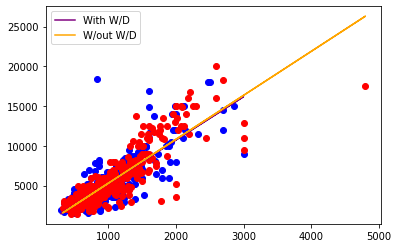

In [41]:
# OK, so the graph shows that the best fit lines for units that have a dishwasher and are then broken up into those with and those without washer/dryers are almost identical. So although the previous comparison of all units made it seem like a washer/dryer was a major factor in price, it apperas to be more compliecated then that since there is not a significant difference; in fact, the units without are slightly more expensive! At this point it might be interesting to explore whether something like laundry tapers off in high end units where the building could offer laundry services which would not require in unit washer/dryers.

plt.subplot()
plt.scatter(X_2_with,y_2_with, color='blue')
plt.scatter(X_2_without,y_2_without, color='red')
plt.plot(X_2_with,y_2_with_predict, color='purple')
plt.plot(X_2_without,y_2_without_predict, color='orange')
plt.legend(['With W/D', 'W/out W/D'])
plt.show()

In [42]:
#Next, I want to look at the affect of distance to a subwaystop. The column is 'min_to_subway' which is somewhat problematic because there are lots of unknowns in that measurement. For example, time walking with kids, or time by wheelchair, etc. would all affect this. Looking at NYC transit guide, the estimates are that short blocks can be covered in 1 minute while regular (long) blocks take 3-4. First I want to get a sense of the distribution of the units.

min_to_subway = streeteasy.min_to_subway
print(min_to_subway)


0       9
1       4
2       4
3       2
4       3
       ..
4995    9
4996    5
4997    2
4998    6
4999    4
Name: min_to_subway, Length: 5000, dtype: int64


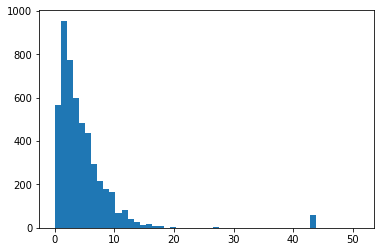

5.0792
4.0
4.600081037277148
4.0


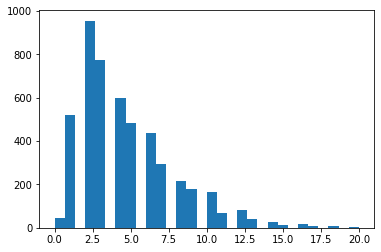

In [43]:
#OK, this shows that there are a few outliers that could skew the data. I'm going to restrict the set to those units with walk of less than 20 minutes. To do this I'll use a list comprehension because it's a fairly simple calculation. I have to change the way I calculate the avg time because of switching from a series to a list. After plotting the focused data using a histogram, two things stand out to me. One is that the gaps in the data lead me to assume that the min_to_subway column is built off from applying an alogrithm to a known distance from the subway. Two, that the
plt.subplot()
plt.hist(min_to_subway, bins=50)
plt.show()
print(min_to_subway.mean())
print(min_to_subway.median())
focused_min_to_subway = [min for min in min_to_subway if min <= 20]
print(mean(focused_min_to_subway))
print(median(focused_min_to_subway))
plt.subplot()
plt.hist(focused_min_to_subway, bins=30)
plt.show()

In [44]:
#Not that I have a sense of the grouping of the data, I can see the effect on rent. Based on the histograms, above, I'm going to plot four lines: 1) All units in the focused dataset, 2) units with walks less than 2 min, 3) units with walks between 2 and 4 min, 4) units with walks greater than 4 min. 
subway_less_20 = streeteasy.loc[streeteasy['min_to_subway'] <= 20]
x_subway_less_20 = subway_less_20['size_sqft']
y_subway_less_20 = subway_less_20['rent']
x_subway_less_20 = x_subway_less_20.values.reshape(-1,1)
reg_sub = LinearRegression()
reg_sub = reg_sub.fit(x_subway_less_20,y_subway_less_20)
y_subway_less_20_predict = reg_sub.predict(x_subway_less_20)

#group 1 less than 2 min
subway_1 = streeteasy.loc[streeteasy['min_to_subway'] < 2]
X_subway_1 = subway_1['size_sqft']
X_subway_1 = X_subway_1.values.reshape(-1,1)
y_subway_1 = subway_1['rent']
reg_sub_1 = LinearRegression()
reg_sub_1 = reg_sub_1.fit(X_subway_1,y_subway_1)
y_subway_1_predict = reg_sub_1.predict(X_subway_1)

#group 2 between 2 and 4 min
subway_2 = streeteasy.loc[(streeteasy['min_to_subway'] >= 2) & (streeteasy['min_to_subway'] <= 4)]
X_subway_2 = subway_2['size_sqft']
X_subway_2 = X_subway_2.values.reshape(-1,1)
y_subway_2 = subway_2['rent']
reg_sub_2 = LinearRegression()
reg_sub_2 = reg_sub_2.fit(X_subway_2,y_subway_2)
y_subway_2_predict = reg_sub_2.predict(X_subway_2)

#group 3 greater than 4 min
subway_3 = streeteasy.loc[streeteasy['min_to_subway'] > 4]
X_subway_3 = subway_3['size_sqft']
X_subway_3 = X_subway_3.values.reshape(-1,1)
y_subway_3 = subway_3['rent']
reg_sub_3 = LinearRegression()
reg_sub_3 = reg_sub_3.fit(X_subway_3,y_subway_3)
y_subway_3_predict = reg_sub_3.predict(X_subway_3)


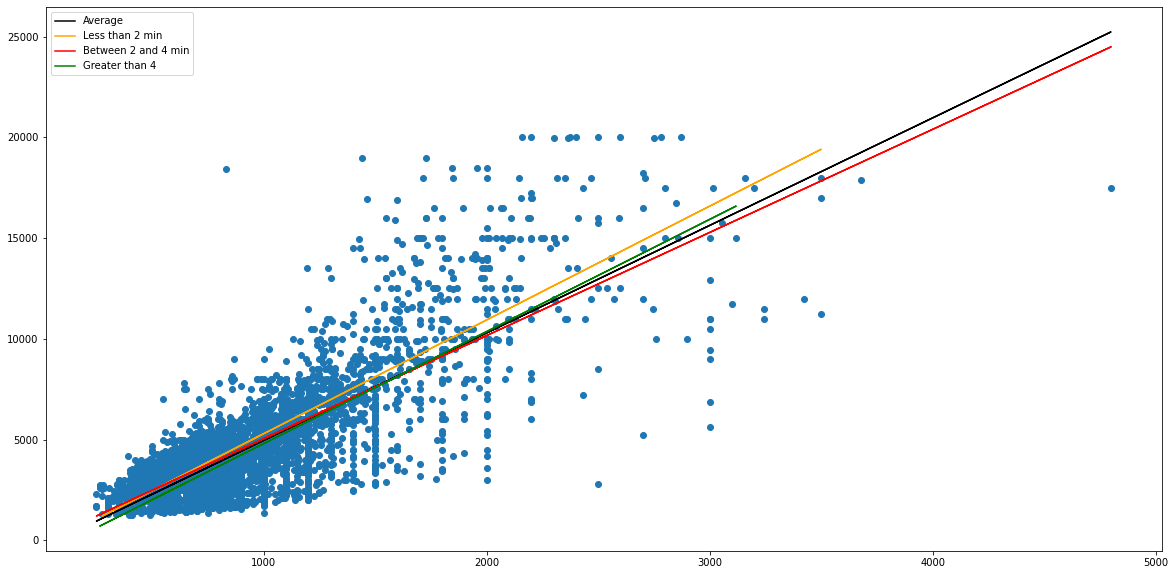

In [45]:
# So we see that min_to_subway does impact price, but because the impact is smaller (coefficient of -14 from above) in comparison with other variables, when we start to segment the data we see that these other changes make the time_to_subway negligent. 
plt.figure(figsize=(20,10))
plt.subplot()
plt.scatter(x_subway_less_20,y_subway_less_20)
plt.plot(x_subway_less_20,y_subway_less_20_predict, color='black')
plt.plot(X_subway_1,y_subway_1_predict, color='orange')
plt.plot(X_subway_2,y_subway_2_predict, color='red')
plt.plot(X_subway_3,y_subway_3_predict, color='green')
plt.legend(['Average', 'Less than 2 min', 'Between 2 and 4 min', 'Greater than 4'])
plt.show()

In [46]:
#OK, these results are a little unexpected. I want to check against all unites with greater than 20 minute walks just to be sure. 
over_20 = streeteasy.loc[streeteasy['min_to_subway'] > 20]

X_over_20 = over_20['size_sqft']
X_over_20 = X_over_20.values.reshape(-1,1)
y_over_20 = over_20['rent']
reg_over_20 = LinearRegression()
reg_over_20 = reg_over_20.fit(X_over_20,y_over_20)
y_over_20_predict = reg_over_20.predict(X_over_20)


In [47]:
plt.figure(figsize=(20,10))
plt.subplot()
plt.plot(x_subway_less_20,y_subway_less_20_predict, color='black')
plt.plot(X_subway_1,y_subway_1_predict, color='orange')
plt.plot(X_subway_2,y_subway_2_predict, color='red')
plt.plot(X_subway_3,y_subway_3_predict, color='green')
plt.plot(X_over_10,y_over_10_predict, color='blue')
plt.legend(['Average', 'Less than 2 min', 'Between 2 and 4 min', 'Greater than 4','Over 20'])
plt.show()

NameError: name 'X_over_10' is not defined

In [409]:
#Finally, I want to write a function that will take the rent, neighborhood, size in sqft, and whether the unit has an elevator and a doorman in as parameters and return whether the unit is over or underpriced and by how much. Becuase of the ways the data is labeled, I first need to check the area against the right selection of units. I also want to make sure that the unit is compared to others of comporable size. To do this, I will compare with unites within 50% of the total size. So unites in the range of .75*size to 1.25*size.

def price_compare(location, rent, size, elevator, doorman):
    mean_price = 0
    X_for_scatter = streeteasy['size_sqft']
    y_for_scatter = streeteasy['rent']
    if location in list(streeteasy['neighborhood']):
        data = streeteasy.loc[streeteasy['neighborhood'] == location]
        if elevator == 1:
            data_yes_elevator = data.loc[data['has_elevator'] == 1]
            if doorman == 1:
                data_yes_elevator_yes_doorman = data_yes_elevator.loc[data_yes_elevator['has_doorman'] == 1]
                to_compare = data_yes_elevator_yes_doorman.loc[(data_yes_elevator_yes_doorman['size_sqft'] >= .75*size) & (data_yes_elevator_yes_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
            else: #doorman == 0
                data_yes_elevator_no_doorman = data_yes_elevator.loc[data_yes_elevator['has_doorman'] == 0]
                to_compare = data_yes_elevator_no_doorman.loc[(data_yes_elevator_no_doorman['size_sqft'] >= .75*size) & (data_yes_elevator_no_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
            data_no_elevator = data.loc[data['has_elevator'] == 0]
            if doorman == 1:
                data_no_elevator_yes_doorman = data_no_elevator.loc[data_no_elevator['has_doorman'] == 1]
                to_compare = data_no_elevator_yes_doorman.loc[(data_no_elevator_yes_doorman['size_sqft'] >= .75*size) & (data_no_elevator_yes_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
            else: #doorman == 0
                data_no_elevator_no_doorman = data_no_elevator.loc[data_no_elevator['has_doorman'] == 0]
                to_compare = data_no_elevator_no_doorman.loc[(data_no_elevator_no_doorman['size_sqft'] >= .75*size) & (data_no_elevator_no_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()    
    elif location in list(streeteasy['submarket']):
        data = streeteasy.loc[streeteasy['submarket'] == location]
        if elevator == 1:
            data_yes_elevator = data.loc[data['has_elevator'] == 1]
            if doorman == 1:
                data_yes_elevator_yes_doorman = data_yes_elevator.loc[data_yes_elevator['has_doorman'] == 1]
                to_compare = data_yes_elevator_yes_doorman.loc[(data_yes_elevator_yes_doorman['size_sqft'] >= .75*size) & (data_yes_elevator_yes_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
            else: #doorman == 0
                data_yes_elevator_no_doorman = data_yes_elevator.loc[data_yes_elevator['has_doorman'] == 0]
                to_compare = data_yes_elevator_no_doorman.loc[(data_yes_elevator_no_doorman['size_sqft'] >= .75*size) & (data_yes_elevator_no_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
        else:
            data_no_elevator = data.loc[data['has_elevator'] == 0]
            if doorman == 1:
                data_no_elevator_yes_doorman = data_no_elevator.loc[data_no_elevator['has_doorman'] == 1]
                to_compare = data_no_elevator_yes_doorman.loc[(data_no_elevator_yes_doorman['size_sqft'] >= .75*size) & (data_no_elevator_yes_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
            else: #doorman == 0
                data_no_elevator_no_doorman = data_no_elevator.loc[data_no_elevator['has_doorman'] == 0]
                to_compare = data_no_elevator_no_doorman.loc[(data_no_elevator_no_doorman['size_sqft'] >= .75*size) & (data_no_elevator_no_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
    else: #location in streeteasy['borough']
        data = streeteasy.loc[streeteasy['borough'] == location]
        if elevator == 1:
            data_yes_elevator = data.loc[data['has_elevator'] == 1]
            if doorman == 1:
                data_yes_elevator_yes_doorman = data_yes_elevator.loc[data_yes_elevator['has_doorman'] == 1]
                to_compare = data_yes_elevator_yes_doorman.loc[(data_yes_elevator_yes_doorman['size_sqft'] >= .75*size) & (data_yes_elevator_yes_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
            else: #doorman == 0
                data_yes_elevator_no_doorman = data_yes_elevator.loc[data_yes_elevator['has_doorman'] == 0]
                to_compare = data_yes_elevator_no_doorman.loc[(data_yes_elevator_no_doorman['size_sqft'] >= .75*size) & (data_yes_elevator_no_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
        else:
            data_no_elevator = data.loc[data['has_elevator'] == 0]
            if doorman == 1:
                data_no_elevator_yes_doorman = data_no_elevator.loc[data_no_elevator['has_doorman'] == 1]
                to_compare = data_no_elevator_yes_doorman.loc[(data_no_elevator_yes_doorman['size_sqft'] >= .75*size) & (data_no_elevator_yes_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
            else: #doorman == 0
                data_no_elevator_no_doorman = data_no_elevator.loc[data_no_elevator['has_doorman'] == 0]
                to_compare = data_no_elevator_no_doorman.loc[(data_no_elevator_no_doorman['size_sqft'] >= .75*size) & (data_no_elevator_no_doorman['size_sqft'] <= 1.25*size)]
                if len(to_compare) == 0:
                    X_to_compare = [0]
                    y_to_compare = [0]
                    y_to_compare_predict = [0]
                    mean_price = 0
                    er = 'There are no untis in this area of comporable size.'
                else:
                    X_to_compare = to_compare['size_sqft']
                    y_to_compare = to_compare['rent']
                    X_to_compare = X_to_compare.values.reshape(-1,1)
                    reg_to_compare = LinearRegression()
                    reg_to_compare = reg_to_compare.fit(X_to_compare,y_to_compare)
                    y_to_compare_predict = reg_to_compare.predict(X_to_compare)
                    mean_price = y_to_compare.mean()
    plt.figure(figsize=(20,10))
    ax1 = plt.subplot(1,2,1)
    plt.title('Comparison of All Units')
    plt.xlabel('Size in sqft')
    plt.ylabel('Rent')
    plt.scatter(X_for_scatter,y_for_scatter)
    plt.scatter(size,rent,marker='x')
    plt.plot(X_to_compare,y_to_compare_predict, color='red')
    ax2 = plt.subplot(1,2,2)
    plt.title('Comparison of Comporable Units in ' + location)
    plt.xlabel('Size in sqft')
    plt.ylabel('Rent')
    plt.scatter(size,rent,marker='x',color='red')
    plt.plot(X_to_compare,y_to_compare_predict, color='red')
    plt.show()
    print('The mean price for comparable sized units in ' + location + ' is $' + str(round(mean_price)) + '/month.')
    if mean_price == 0:
        print(er)
    elif mean_price >= rent:
        print('The unit is well priced.')
    else:
        print('The unit is over priced.')
    

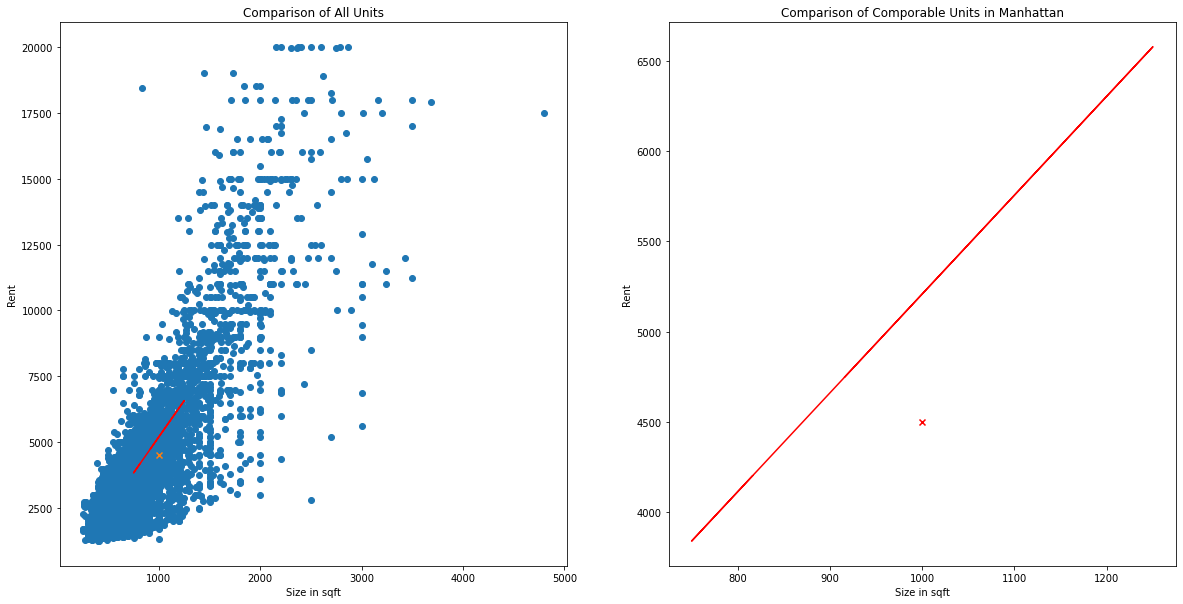

The mean price for comparable sized units in Manhattan is $4912/month.
The unit is well priced.


In [410]:
price_compare('Manhattan',4500,1000,1,1)

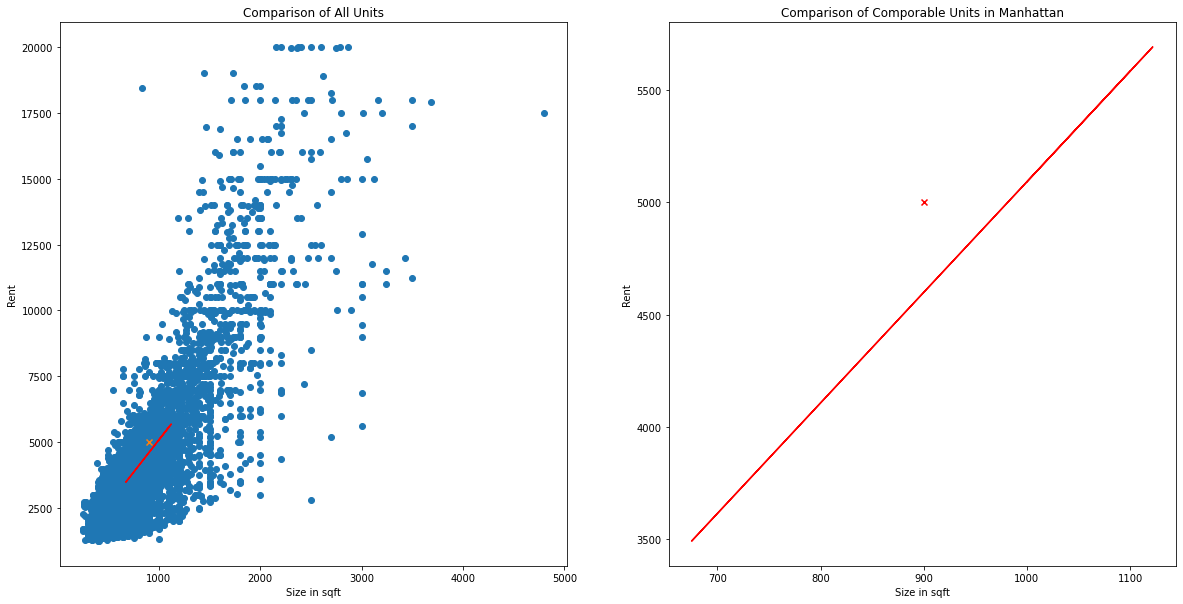

The mean price for comparable sized units in Manhattan is $4371/month.
The unit is over priced.


In [413]:
price_compare('Manhattan',5000,900,0,0)

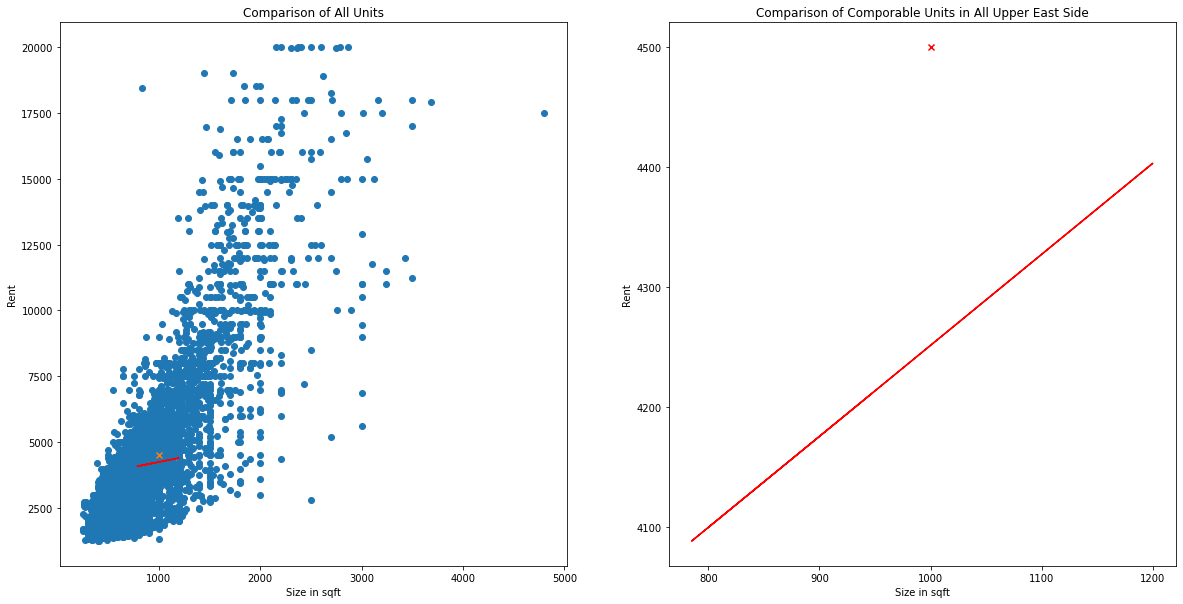

The mean price for comparable sized units in All Upper East Side is $4222/month.
The unit is over priced.


In [415]:
price_compare('All Upper East Side',4500,1000,1,0)